In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import SVR


# covid data set

In [3]:
df = pd.read_csv('covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [7]:
df.Date = pd.to_datetime(df['Date'], format='%d/%m/%y')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [8]:
df1=pd.DataFrame(df.groupby("Date")['Confirmed'].sum())
df1.reset_index(inplace=True)
df1.head()

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [9]:
df1['month'] = df1['Date'].dt.month
df1['day'] = df1['Date'].dt.day
df1['week'] = df1['Date'].dt.week
df1['weekofyear'] = df1['Date'].dt.weekofyear
df1['dayofweek'] = df1['Date'].dt.dayofweek
df1['dayofyear'] = df1['Date'].dt.dayofyear
df1.head()

<ipython-input-9-658efc927cbc>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['week'] = df1['Date'].dt.week
<ipython-input-9-658efc927cbc>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['weekofyear'] = df1['Date'].dt.weekofyear


,Date,Confirmed,month,day,week,weekofyear,dayofweek,dayofyear
0,2020-01-30,1,1,30,5,5,3,30
1,2020-01-31,1,1,31,5,5,4,31
2,2020-02-01,2,2,1,5,5,5,32
3,2020-02-02,3,2,2,5,5,6,33
4,2020-02-03,3,2,3,6,6,0,34


In [10]:
features = df1.drop(['Date','Confirmed'],axis=1)
features = features.values
target = df1.Confirmed
plot_x = list(df1.index)

In [11]:
model = LinearRegression()
model.fit(features,target)
preds = model.predict(features)
rmse = np.sqrt(mean_squared_error(target,preds))
print('rmse: ',rmse)

rmse:  1201696.9105912182


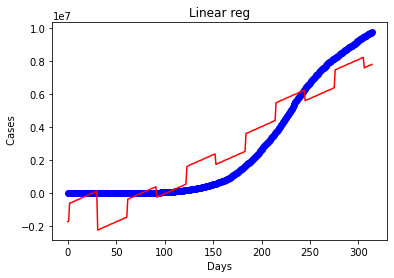

In [13]:
plt.scatter(plot_x,target,color='blue')
plt.plot(plot_x,preds,color='red')
plt.title('Linear reg')
plt.xlabel('Days')
plt.ylabel(' Cases')
plt.show()

In [14]:
polynomial = PolynomialFeatures(degree=3)
poly_features = polynomial.fit_transform(features)
model = LinearRegression()
model.fit(poly_features, target)


LinearRegression()

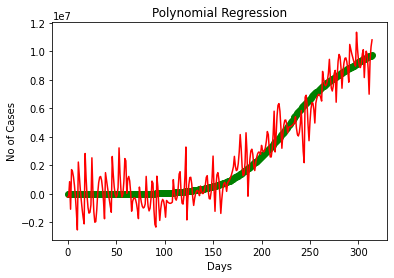

In [15]:
plt.scatter(plot_x,target,color='g')
plt.plot(plot_x,model.predict(polynomial.transform(features)),color='r')
plt.title('Polynomial Regression')
plt.xlabel('Days')
plt.ylabel('No of Cases')
plt.show()

In [16]:
target = target.values

In [17]:
target=np.array(target).reshape(-1,1)

c:\users\gopikrishnan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


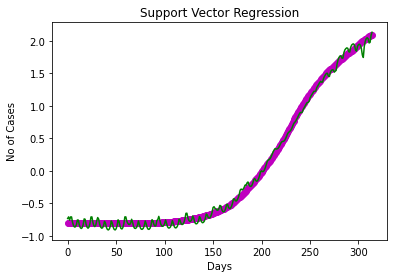

In [18]:
scaler = StandardScaler()


scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

model = SVR(kernel='rbf')
model.fit(scaled_features,scaled_target)

plt.scatter(plot_x, scaled_target, color='m')
plt.plot(plot_x, model.predict(scaled_features), color = 'green')
plt.title('Support Vector Regression')
plt.xlabel('Days')
plt.ylabel('No of Cases')
plt.show()